In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


C:\Users\SKS\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## CNN Model with 3 Convolution Layer,2 Max-Pooling Layer,Dropouts,BatchNormalizations

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 5, 5, 128)         512       
__________

#### Here we have used 3 Convolution Layer with kernel_size=(3,3) with 32,64,128 kernels and 2 Max_Pooling Layers with pool_size=(2,2)  with BatchNormalization and Dropout of .25. By using this model we got Training_Accuracy=99.45%,Training_Loss=0.0177 and Test_Accuracy=99.41%,Test_Loss=0.026 which is Good  

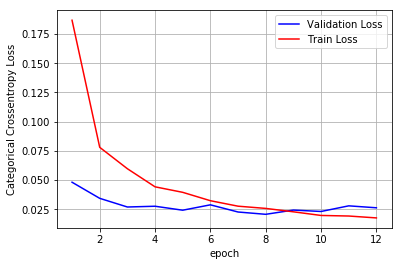

In [12]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Here we can see that there is no overfitting till 12 Epochs as Training and Validation loss are very similar

## CNN Model with 4 Convolution Layer, 3 Max-Pooling Layer,Dropouts,BatchNormalizations

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 256)         819456    
__________

#### Here we have used 4 Convolution Layer with kernel_size=(5,5) with 32,64,128,256 kernels and 3 Max_Pooling Layers with pool_size=(2,2)  with BatchNormalization and Dropout of .25 . By using this model we got Training_Accuracy=99.83%,Training_Loss=0.0064 and Test_Accuracy=99.47%,Test_Loss=0.031 which is Good  

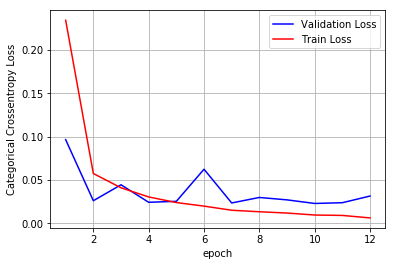

In [7]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Here we can see that there is no overfitting till 12 Epochs as Training and Validation loss are very similar

## CNN Model with 6 Convolution Layer, 3 Max-Pooling Layer,Dropouts,BatchNormalizations

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
model.add(Conv2D(64, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Conv2D(128, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Conv2D(150, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(180, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(200, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(240, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        100416    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 128)         401536    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 3, 128)         512       
__________

#### Here we have used 6 Convolution Layer with kernel_size=(7,7) with 32,64,128,150,180,200 kernels and 3 Max_Pooling Layers with pool_size=(3,3)  with BatchNormalization and Dropout of .25 . By using this model we got Training_Accuracy=99.92%,Training_Loss=0.0029 and Test_Accuracy=99.42%,Test_Loss=0.024 which is Good  

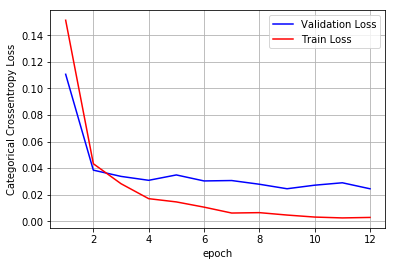

In [9]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion

* Test Accuracy of all 3 Architectures are nearly same 
* As MNIST problem is very easy problem so we can't see much differnce between differnet architectures
* But as Complexity of Problems increases we will see so much difference while using different architectures

In [13]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "No.Convolution_Layer","Kernel_Sizes",'No.of_Kernels','No.of_Max_Pooling_Layers','Pool_Size','Test_Accuracy']

In [14]:
x.add_row(['3','(3x3)','[32,64,128]','2','(2x2)','99.41%'])
x.add_row(['4','(5x5)','[32,64,128,256]','3','(2x2)','99.47%'])
x.add_row(['6','(7x7)','[32,64,128,150,180,200]','3','(3x3)','99.42%'])
print(x)

+----------------------+--------------+-------------------------+--------------------------+-----------+---------------+
| No.Convolution_Layer | Kernel_Sizes |      No.of_Kernels      | No.of_Max_Pooling_Layers | Pool_Size | Test_Accuracy |
+----------------------+--------------+-------------------------+--------------------------+-----------+---------------+
|          3           |    (3x3)     |       [32,64,128]       |            2             |   (2x2)   |     99.41%    |
|          4           |    (5x5)     |     [32,64,128,256]     |            3             |   (2x2)   |     99.47%    |
|          6           |    (7x7)     | [32,64,128,150,180,200] |            3             |   (3x3)   |     99.42%    |
+----------------------+--------------+-------------------------+--------------------------+-----------+---------------+
